# DATA INSIGHTS OF INTERNATIONAL VISITORS TO LONDON


## 1. Pendahuluan

### 1.1. Latar Belakang

Pengunjung Internasional di suatu negara dapat memiliki dampak atau keuntungan dalam beberapa aspek. Salah satu diantaranya adalah pada sektor pariwisata yang memegang peranan penting dalam perekonomian, baik sebagai salah satu sumber penerimaan devisa maupun penciptaan lapangan kerja dan kesempatan bisnis. 

Negara atau perusahaan dalam bidang tourism akan membutuhkan data pengunjung sebagai deskripsi untuk membuat strategi dalam aktivitas bisnis untuk meningkatkan pendapatan.



### 1.2. Sumber Data

Data diperoleh dari https://data.london.gov.uk/dataset/number-international-visitors-london. Semua data diambil dari International Passenger Survey (IPS). Data menunjukkan total pengeluaran pengunjung untuk malam, kunjungan, dan pembelanjaan serta dipecah berdasarkan tujuan, durasi, mode, dan negara.

### 1.3. Pertanyaan

Data ini tentang pengunjung internasional yang berkunjung ke London antara tahun 2002 - 2020. Dari analisi yang akan dilakukan dapat menghasilkan wawasan dan menjawab pertanyaan seperti :

1. Berapa banyak total pengunjung London dari tahun ke tahun?
2. Sebagian besar pengunjung datang dari mana untuk mengunjungi London?
3. Apa tujuan kunjungan mereka ke London?
4. Transportasi apa yang paling disukai oleh sebagian besar pengunjung?
5. Berapa lama waktu yang dihabiskan pengunjung di London?
6. Berapa banyak uang yang mereka habiskan untuk tinggal/malam, belanja, dan kunjungan?


## 2. Proses Analisis Data

### 2.1. Mengimpor Library yang Dibutuhkan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### 2.2. Menyiapkan Data

In [2]:
# Menyiapkan dataset

df = pd.read_csv(r'C:\Users\ASUS\OneDrive\Dokumen\pj2\international-visitors-london.csv', encoding='unicode_escape')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61462 entries, 0 to 61461
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           61462 non-null  object 
 1   quarter        61462 non-null  object 
 2   market         61462 non-null  object 
 3   dur_stay       61462 non-null  object 
 4   mode           61462 non-null  object 
 5   purpose        61462 non-null  object 
 6   area           61462 non-null  object 
 7   Visits (000s)  61462 non-null  float64
 8   Spend (£m)     61462 non-null  float64
 9   Nights (000s)  61462 non-null  float64
 10  sample         61462 non-null  int64  
dtypes: float64(3), int64(1), object(7)
memory usage: 5.2+ MB


Data memiliki 11 kolom x 61462 baris

In [3]:
# Mengecek missing value

df.isnull().sum()

year             0
quarter          0
market           0
dur_stay         0
mode             0
purpose          0
area             0
Visits (000s)    0
Spend (£m)       0
Nights (000s)    0
sample           0
dtype: int64

Tidak ditemukan missing value didalam data

In [4]:
# Melihat gambaran data

df.head()

,year,quarter,market,dur_stay,mode,purpose,area,Visits (000s),Spend (£m),Nights (000s),sample
0,2002,January-March,Belgium,1-3 nights,Air,Holiday,LONDON,3.572186,0.969138,6.954456,5
1,2002,January-March,Belgium,1-3 nights,Air,Business,LONDON,9.284226,2.399577,12.604959,19
2,2002,January-March,Belgium,1-3 nights,Air,VFR,LONDON,0.877182,0.089833,2.153128,3
3,2002,January-March,Belgium,1-3 nights,Air,Miscellaneous,LONDON,0.163874,0.010160,0.163874,1
4,2002,January-March,Belgium,1-3 nights,Sea,Business,LONDON,1.648670,0.016789,1.650300,1


In [5]:
# Mengecek nilai unik tahun

df['year'].unique()

array(['2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', '2019', '2020P'], dtype=object)

In [6]:
# Mengecek nilai unik quarter

df['quarter'].unique()

array(['January-March', 'April-June', 'July-September',
       'October-December'], dtype=object)

In [7]:
# Mengecek nilai unik asal daerah turis (market)

df['market'].unique()

array(['Belgium', 'Luxembourg', 'France', 'Germany', 'Italy',
       'Netherlands', 'Denmark', 'Greece', 'Spain', 'Portugal', 'Austria',
       'Sweden', 'Finland', 'Irish Republic', 'Turkey', 'Switzerland',
       'Norway', 'Iceland', 'Czech Republic', 'Poland', 'Hungary',
       'Russia', 'Other Western Europe', 'Other Eastern Europe', 'USA',
       'Canada', 'Mexico', 'Brazil', 'Argentina',
       'Other Central & South America', 'Hong Kong', 'Malaysia',
       'Thailand', 'Singapore', 'Taiwan', 'China', 'Other Asia', 'Japan',
       'South Korea', 'Australia', 'New Zealand', 'United Arab Emirates',
       'Saudi Arabia', 'Kuwait', 'Other Middle East', 'Egypt', 'Israel',
       'India', 'Pakistan', 'South Africa', 'Other Southern Africa',
       'Nigeria', 'Kenya', 'Other Africa', 'Bulgaria', 'Romania',
       'Serbia', 'Chile', 'Indonesia', 'Bahrain', 'Oman', 'Qatar'],
      dtype=object)

In [8]:
# Mengecek nilai unik durasi 

df['dur_stay'].unique()

array(['1-3  nights', '4-7  nights', '8-14 nights', '15+  nights'],
      dtype=object)

In [9]:
# Mengecek nilai unik transportasi

df['mode'].unique()

array(['Air', 'Sea', 'Tunnel'], dtype=object)

In [10]:
# Mengecek nilai unik tujuan

df['purpose'].unique()

array(['Holiday', 'Business', 'VFR', 'Miscellaneous', 'Study'],
      dtype=object)

### 2.3 Eksplorasi Data

#### 2.3.1. Berapa banyak total pengunjung London dari tahun ke tahun?

In [43]:
df.head(3)

,year,quarter,market,dur_stay,mode,purpose,area,Visits (000s),Spend (£m),Nights (000s),sample
0,2002,January-March,Belgium,1-3 nights,Air,Holiday,LONDON,3.572186,0.969138,6.954456,5
1,2002,January-March,Belgium,1-3 nights,Air,Business,LONDON,9.284226,2.399577,12.604959,19
2,2002,January-March,Belgium,1-3 nights,Air,VFR,LONDON,0.877182,0.089833,2.153128,3


In [44]:
# jumlah total pengunjang London pada rentang tahun 2002 - 2020

df.groupby(['year'])[['sample']].sum()

,sample
year,
2002,22359
2003,20906
2004,23309
2005,23994
2006,24206
2007,21596
2008,17997
2009,23063
2010,23459


In [45]:
# analisis deskriptif jumlah total pengunjang London pada rentang tahun 2002 - 2020

df.groupby(['year'])[['sample']].sum().describe()

,sample
count,19.000000
mean,19729.368421
std,4944.158317
min,2629.000000
25%,19219.000000
50%,20725.000000
75%,22711.000000
max,24206.000000


Text(0.5, 1.0, 'Total Pengunjung Internasional ke London Tahun 2002 - 2020')

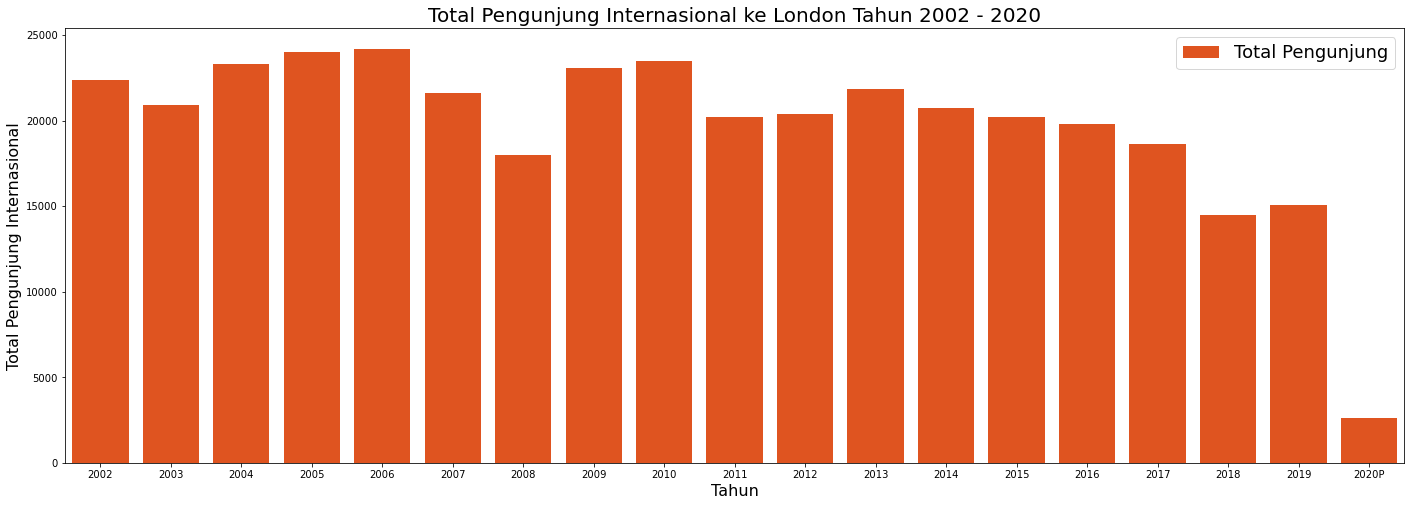

In [63]:
# Visualisasi data

fig=plt.subplots(1,1,figsize=(24,8))
sns.barplot(x = df.groupby(['year'])['sample'].sum().index, 
            y = df.groupby(['year'])['sample'].sum().values,
            color='orangered', label='Total Pengunjung')

plt.legend(fontsize=18)
plt.xlabel('Tahun', fontsize=16)
plt.ylabel('Total Pengunjung Internasional', fontsize=16)
plt.title('Total Pengunjung Internasional ke London Tahun 2002 - 2020', fontsize=20)

Banyak Pengunjung Internasional ke London pada tahun 2002 - 2020 adalah:
- Rata - rata : 19729 pengunjung
- Tertinggi : 24206 pengunjung, pada tahun 2006
- Terendah : 2629, pada tahun 2020

In [113]:
# waktu per 3 bulan

df.groupby(['quarter'])[['sample']].sum()

,sample
quarter,
April-June,99094
January-March,88079
July-September,97948
October-December,89737


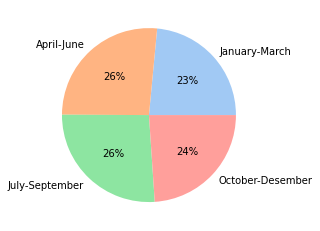

In [114]:
# Visualisasi
data_tr = ['January-March', 'April-June', 'July-September', 'October-Desember']
total = [88079, 99094, 97948, 89737]

colors = sns.color_palette('pastel')[0:4]

plt.pie(total, labels = data_tr, colors = colors, autopct='%.0f%%')
plt.show()

Dalam setahun, total pengunjung dari setiap 3 bulan memiliki nilai persentase tidak jauh berbeda

#### 2.3.2. Sebagian besar pengunjung datang dari mana untuk mengunjungi London?

In [52]:
df.head(3)

,year,quarter,market,dur_stay,mode,purpose,area,Visits (000s),Spend (£m),Nights (000s),sample
0,2002,January-March,Belgium,1-3 nights,Air,Holiday,LONDON,3.572186,0.969138,6.954456,5
1,2002,January-March,Belgium,1-3 nights,Air,Business,LONDON,9.284226,2.399577,12.604959,19
2,2002,January-March,Belgium,1-3 nights,Air,VFR,LONDON,0.877182,0.089833,2.153128,3


In [55]:
# Asal lokasi Pengunjung ke London 2002 - 2020

df.groupby(['market'])[['sample']].sum()

,sample
market,
Argentina,1294
Australia,19901
Austria,3401
Bahrain,398
Belgium,7602
...,...
Taiwan,889
Thailand,1234
Turkey,2333


In [56]:
# analisis deskriptif Asal lokasi Pengunjung ke London 2002 - 2020

df2.groupby(['market'])[['sample']].sum().describe()

,sample
count,62.000000
mean,6046.096774
std,10546.655502
min,212.000000
25%,1626.000000
50%,3017.500000
75%,5990.750000
max,75010.000000


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Total Pengunjung Internasional ke London Berdasarkan Asal Negara Tahun pada Rentang 2002 - 2020')

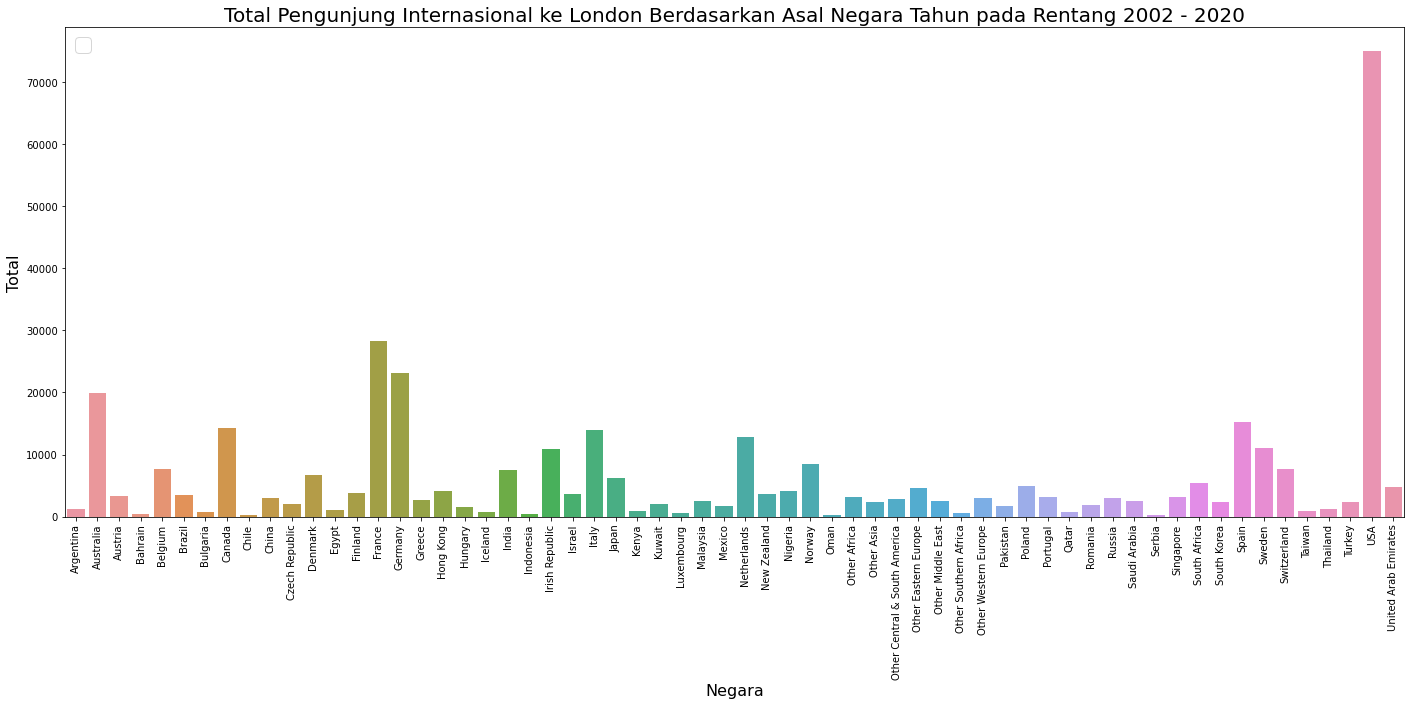

In [99]:
# Visualisasi data

fig=plt.subplots(1,1,figsize=(24,9))
sns.barplot(x = df.groupby(['market'])['sample'].sum().index, 
            y = df.groupby(['market'])['sample'].sum().values)

plt.legend(fontsize=20)
plt.xlabel('Negara', fontsize=16)
plt.xticks(rotation = 90)
plt.ylabel('Total', fontsize=16)
plt.title('Total Pengunjung Internasional ke London Berdasarkan Asal Negara Tahun pada Rentang 2002 - 2020', fontsize=20)

In [65]:
df_top.sort_values((['sample']), axis=0, ascending=[False])

,sample
market,
USA,75010
France,28272
Germany,23120
Australia,19901
Spain,15174
...,...
Bahrain,398
Indonesia,377
Chile,344


Asal lokasi pengunjung Internasional ke London pada tahun 2002 - 2020 adalah:
- Tertinggi : Berasal dari USA (75010 pengunjung)
- Terendah : Berasal dari Serbia (212 pengunjung)

In [90]:
# Top 10 Asal lokasi Pengunjung London 2002 - 2020

df_top = df.groupby(['market'])[['sample']].sum()
new_dftop = df_top.sort_values((['sample']), axis=0, ascending=[False])[:10]
new_dftop

,sample
market,
USA,75010
France,28272
Germany,23120
Australia,19901
Spain,15174
Canada,14203
Italy,13983
Netherlands,12804
Sweden,11058


Text(0, 0.5, 'Negara')

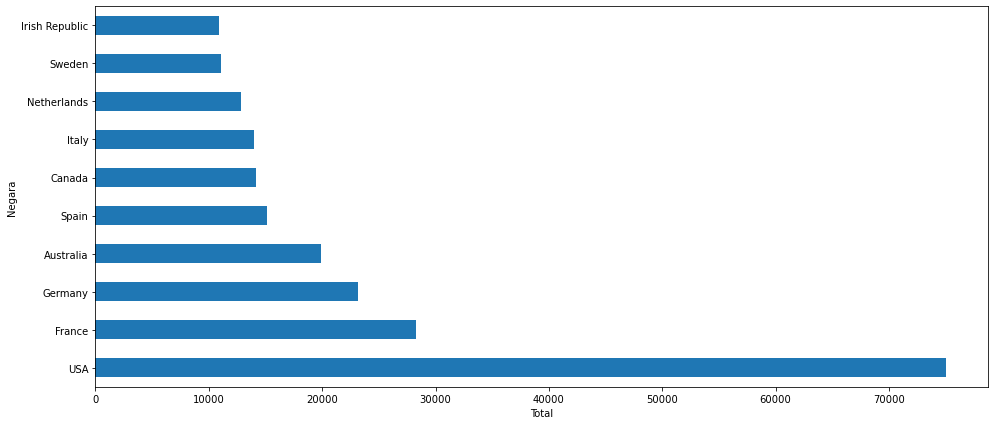

In [100]:
# Visualisasi Data

fig, ax = plt.subplots(figsize=(16,7))
new_dftop.plot(kind='barh', legend=False, ax=ax)
ax.set_xlabel('Total')
ax.set_ylabel('Negara')


#### 2.3.3. Apa tujuan kunjungan mereka ke London?

In [101]:
df.head(3)

,year,quarter,market,dur_stay,mode,purpose,area,Visits (000s),Spend (£m),Nights (000s),sample
0,2002,January-March,Belgium,1-3 nights,Air,Holiday,LONDON,3.572186,0.969138,6.954456,5
1,2002,January-March,Belgium,1-3 nights,Air,Business,LONDON,9.284226,2.399577,12.604959,19
2,2002,January-March,Belgium,1-3 nights,Air,VFR,LONDON,0.877182,0.089833,2.153128,3


In [102]:
# Tujuan pengunjung ke london

df.groupby(['purpose'])[['sample']].sum()

,sample
purpose,
Business,87035
Holiday,160798
Miscellaneous,34589
Study,4077
VFR,88359


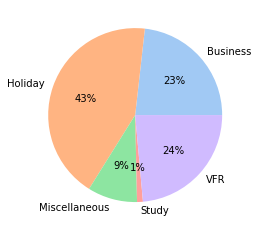

In [103]:
#Visualisasi

data_tujuan = ['Business', 'Holiday', 'Miscellaneous', 'Study', 'VFR']
total = [87035, 160798, 34589, 4077, 88359]

colors = sns.color_palette('pastel')[0:5]

plt.pie(total, labels = data_tujuan, colors = colors, autopct='%.0f%%')
plt.show()

Dari tahun 2002 hingga 2020 tujuan pengunjung mengunjungi London adalah:
- 43% untuk berlibur
- 24% untuk mengunjungi keluarga atau teman
- 23% untuk keperluan bisnis
- 9% untuk kepentingan lain
- 1% untuk study

#### 2.3.4. Transportasi apa yang paling disukai oleh sebagian besar pengunjung?

In [104]:
df.head(3)

,year,quarter,market,dur_stay,mode,purpose,area,Visits (000s),Spend (£m),Nights (000s),sample
0,2002,January-March,Belgium,1-3 nights,Air,Holiday,LONDON,3.572186,0.969138,6.954456,5
1,2002,January-March,Belgium,1-3 nights,Air,Business,LONDON,9.284226,2.399577,12.604959,19
2,2002,January-March,Belgium,1-3 nights,Air,VFR,LONDON,0.877182,0.089833,2.153128,3


In [105]:
# Transportasi pengunjung

df2.groupby(['mode'])[['sample']].sum()

,sample
mode,
Air,321849
Sea,15138
Tunnel,37871


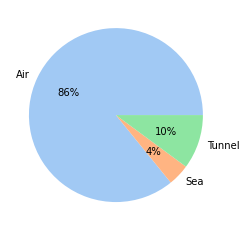

In [106]:
# Visualisasi
data_tr = ['Air', 'Sea', 'Tunnel']
total = [321849, 15138, 37871]

colors = sns.color_palette('pastel')[0:3]

plt.pie(total, labels = data_tr, colors = colors, autopct='%.0f%%')
plt.show()

Sebagian besar pengunjung, 86% menyukai transportasi jalur Udara ketika mengunjungi London. Sebagian yaitu 10% jalur terowongan/kereta dan 4% jalur laut.

#### 2.3.5. Berapa lama waktu yang dihabiskan pengunjung di London?

In [109]:
df.head(3)

,year,quarter,market,dur_stay,mode,purpose,area,Visits (000s),Spend (£m),Nights (000s),sample
0,2002,January-March,Belgium,1-3 nights,Air,Holiday,LONDON,3.572186,0.969138,6.954456,5
1,2002,January-March,Belgium,1-3 nights,Air,Business,LONDON,9.284226,2.399577,12.604959,19
2,2002,January-March,Belgium,1-3 nights,Air,VFR,LONDON,0.877182,0.089833,2.153128,3


In [110]:
# durasi pengunjung berada di London

df.groupby(['dur_stay'])[['sample']].sum()

,sample
dur_stay,
1-3 nights,166824
15+ nights,37103
4-7 nights,119630
8-14 nights,51301


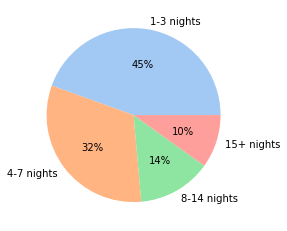

In [111]:
# Visualisasi
data_tr = ['1-3 nights', '4-7 nights', '8-14 nights', '15+ nights']
total = [166824, 119630, 51301, 37103]

colors = sns.color_palette('pastel')[0:4]

plt.pie(total, labels = data_tr, colors = colors, autopct='%.0f%%')
plt.show()

Lama waktu yang dihabiskan pengunjung di London adalah 45% 1-3 hari dan terkecil 10% menghabiskan waktu di London lebih dari 15 hari

#### 2.3.6. Berapa banyak biaya yang mereka habiskan untuk tinggal/malam, belanja, dan kunjungan?

In [127]:
df.head(3)

,year,quarter,market,dur_stay,mode,purpose,area,Visits (000s),Spend (£m),Nights (000s),sample
0,2002,January-March,Belgium,1-3 nights,Air,Holiday,LONDON,3.572186,0.969138,6.954456,5
1,2002,January-March,Belgium,1-3 nights,Air,Business,LONDON,9.284226,2.399577,12.604959,19
2,2002,January-March,Belgium,1-3 nights,Air,VFR,LONDON,0.877182,0.089833,2.153128,3


In [120]:
df_val = df.groupby(['year'])[['Spend (£m)','Visits (000s)', 'Nights (000s)']].sum()
df_val

,Spend (£m),Visits (000s),Nights (000s)
year,,,
2002,5787.853522,11603.382079,75402.111587
2003,5869.946135,11695.750442,78946.702332
2004,6439.274949,13389.330411,90237.321382
2005,6858.580913,13892.568979,91843.262167
2006,7821.599766,15592.646141,101067.639106
2007,8192.406637,15339.771490,95846.142288
2008,8125.685818,14752.993692,90814.916342
2009,8910.227327,15092.329471,91790.390106
2010,9506.843968,15353.011208,96369.631296


In [130]:
# Analisis deskriptif

df.groupby(['year'])[['Spend (£m)','Visits (000s)', 'Nights (000s)']].sum().describe()

,Spend (£m),Visits (000s),Nights (000s)
count,19.000000,19.000000,19.000000
mean,9984.774989,15940.172109,98018.472232
std,3789.361654,4306.499821,23975.171045
min,2555.564919,3696.257306,21373.345806
25%,7340.090340,14322.781336,91302.653224
50%,9506.843968,15592.646141,97863.549267
75%,12933.973520,18786.816474,114918.972465
max,16267.399177,21713.465176,130488.255827


Text(0.5, 0, 'Tahun')

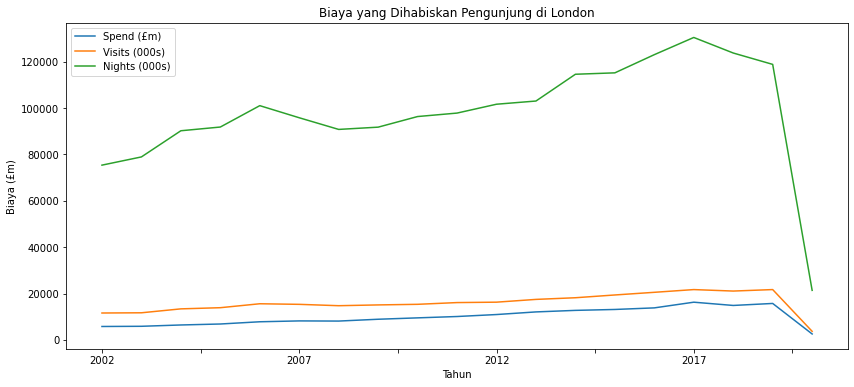

In [129]:
#visualisasi

df_val.plot(kind = 'line', figsize =(14,6))
plt.title('Biaya yang Dihabiskan Pengunjung di London')
plt.ylabel('Biaya (£m)')
plt.xlabel('Tahun')

Biaya untuk tinggal adalah biaya paling besar pengunjung Internasional di London dengan rata-rata 98018 (£m)